# CSCC11: Cross-Validation Tutorial
Cross-validation is an empirical approach for evaluating a model's performance by dividing the dataset into several parts, using different parts for testing and training in successive iterations.

**Cross-validation can be used for:**
- Mitigating the risk of overfitting
- Comparing different models and selecting the one performing best on average
- Determining appropriate hyperparameter values

**Disadvantages:**
- Can be computationally expensive
- Might not be appropriate for certain data sets

**$N$-Fold Cross-Validation Algorithm**
1. Split dataset into $N$ equal partitions
2. Use one fold for testing and the other $N-1$ folds for training
3. Calculate performance on the test set
4. Repeat Steps 2 and 3 $N$ times
5. Use average accuracy as an estimate of model's performance

When $N=M-1$, where $M$ is the number of data points, this approach is called **leave-one-out cross-validation**.

## In-Class Example

We will perform $N$-fold cross-validation to find an appropriate value of $K$ in a KNN model fitted on the `iris` dataset (can be loaded via Scikit-learn).

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
# Load data

iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# 10-fold cross-validation with K=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [4]:
# search for the best value of K within a certain range
k_range = list(range(1, 31))
k_scores = []
for k in k_range:    
   knn = KNeighborsClassifier(n_neighbors=k)    
   scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
   k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

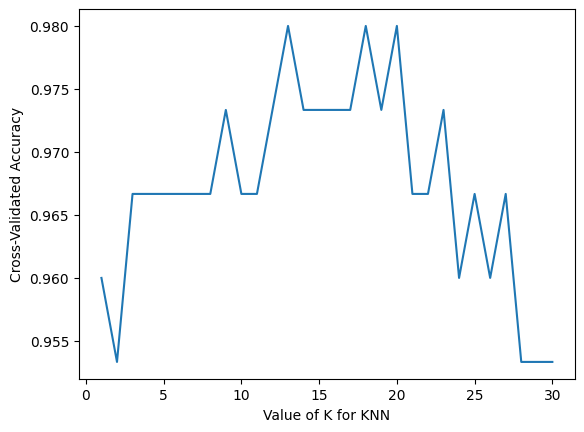

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

We notice that the values 13, 18 and 20 are associated with a higher accuracy.

## Exercise
Repeat the previous example, but this time, implement 10-fold cross-validation without using Scikit-learn's `cross_val_score` function (i.e., find the best value of $K$ in the range 1-30).

Two versions of splitting the data are to be considered: the KFold method and the StratifiedKFold method. KFold splits the dataset into k equal partitions (called folds). StratifiedKFold performs a KFold, but it ensures that each fold has the same proportion of observations with a given label.

(a) In your implementation, use `KFold` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to split the dataset. Are the results consistent with what you obtained previously? If not, what could be the reason?

Text(0, 0.5, 'Cross-Validated Accuracy')

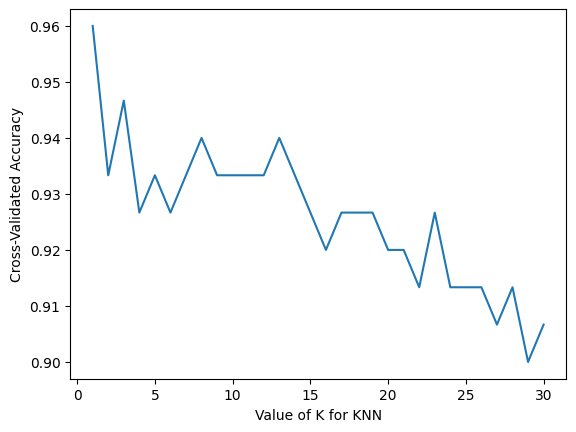

In [15]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

num_partitions = 10

####### INSERT IMPLEMENTATION HERE #######
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=num_partitions, shuffle=False, random_state=None)
    scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)
    
    avg_score = np.mean(scores)
    k_scores.append(avg_score)

##########################################

# Visualize Results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##########################################
# From the graph generated below, k-vals #
# taper off much faster compared to the  #
#   results given by cross_val_score().  #
# Furthermore, the graphs are generally  #
#   rather different from one another.   #
##########################################

(b) Now, use `StratifiedKFold` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) to split the data. Do you notice any difference?

Text(0, 0.5, 'Cross-Validated Accuracy')

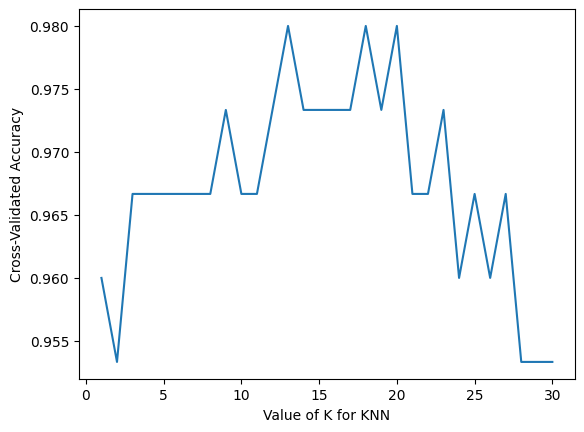

In [17]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

num_partitions = 10

####### INSERT IMPLEMENTATION HERE #######
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = StratifiedKFold(n_splits=num_partitions, shuffle=False, random_state=None)
    scores = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)
    
    avg_score = np.mean(scores)
    k_scores.append(avg_score)


##########################################

# Visualize Results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##########################################
# Waaaaa?! Why are higher values of k    #
# preferable now? This is dang weird...  #
# I'm gonna ask about why this happens   #
#               in TUT!                  #
##########################################